In [3]:
from rouge import Rouge
import os
from nltk import tokenize
import gensim
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import matplotlib.pyplot as plt
import nltk



In [4]:
rouge = Rouge()

In [5]:
import numpy as np
import pandas as pd
import pickle
import sys
import warnings
warnings.filterwarnings("ignore")

In [6]:

from tensorflow.keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import MaxPooling2D
from keras.layers.convolutional import Conv2D
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras import *
from sklearn.utils import shuffle

In [8]:

print("loading pickle files...")
data1 = pickle.load(open("Embedding_saliency1.pickle", "rb"))
data2 = pickle.load(open("Embedding_saliency2.pickle", "rb"))
data3 = pickle.load(open("Embedding_saliency3.pickle", "rb"))
data4 = pickle.load(open("Embedding_saliency4.pickle", "rb"))
data5 = pickle.load(open("Embedding_saliency5.pickle", "rb"))
data6 = pickle.load(open("Embedding_saliency6.pickle", "rb"))
data7 = pickle.load(open("Embedding_saliency7.pickle", "rb"))
data8 = pickle.load(open("Embedding_saliency8.pickle", "rb"))

loading pickle files...


In [9]:
print("concatenating data...")
data = np.concatenate((data1, data2, data3, data4, data5, data6, data7, data8), axis=0)

concatenating data...


In [10]:

print("extracting x and y...")
x = data[::2]
y = data[1::2]

x1 = np.dstack(x)
x2 = np.rollaxis(x1, -1)
x3 = np.array(x2)
x4 =np.expand_dims(x3, 3)
x4.shape

extracting x and y...


(3, 250, 300, 1)

In [11]:

# Model print("training data:", x_train.shape, y_train.shape)parameters
conv_window_size = (3, 300)
num_filters = 50
reg = 0.01
dropout = 0.5

# Training parameters
epochs = 10
batch_size = 256
test_train_ratio = 0.2
val_train_ratio = 0.2

x_train, y_train = x4,y
print("training data:", x_train.shape, y_train.shape)

training data: (3, 250, 300, 1) (3,)


In [12]:
y_train = y_train.reshape(len(y_train),1)

In [13]:
print("training data:", x_train.shape, y_train.shape)

training data: (3, 250, 300, 1) (3, 1)


# convolution network implimentation

In [14]:
model = Sequential()
model.add(layers.Conv2D(input_shape=(x_train.shape[1], x_train.shape[2],1),
                    filters=num_filters,
                    kernel_size=conv_window_size,
                    padding="valid",
                    activation="relu",
                    data_format='channels_last'))
model.add(layers.MaxPooling2D(pool_size=(num_filters, 1)))    
model.add(layers.Flatten())
model.add(layers.Dropout(dropout))
model.add(layers.Dense(3, activation='tanh', kernel_regularizer=regularizers.l2(reg)))
model.add(layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(reg)))

model.summary()
model.compile(loss='binary_crossentropy',optimizer=Adadelta(),metrics=['mae'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 248, 1, 50)        45050     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 1, 50)          0         
_________________________________________________________________
flatten (Flatten)            (None, 200)               0         
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 3)                 603       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 45,657
Trainable params: 45,657
Non-trainable params: 0
____________________________________________________

In [22]:

import tensorflow as tf
tf.keras.utils.plot_model( model, to_file='model.png')

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [23]:
#y_train = y_train.reshape(len(y_train),1)
y_train = y_train.astype(str).astype(float)

In [24]:
type(x_train),x_train.shape,type(y_train),y_train.shape

(numpy.ndarray, (3, 250, 300, 1), numpy.ndarray, (3, 1))

In [25]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=600,
                    validation_split=val_train_ratio)

Epoch 1/600
1/1 [==============================] - 0s 435ms/step - loss: 0.7553 - mae: 1.5000 - val_loss: 0.7553 - val_mae: 1.5000
Epoch 2/600
1/1 [==============================] - 0s 42ms/step - loss: 0.7553 - mae: 1.5000 - val_loss: 0.7553 - val_mae: 1.5000
Epoch 3/600
1/1 [==============================] - 0s 42ms/step - loss: 0.7553 - mae: 1.5000 - val_loss: 0.7553 - val_mae: 1.5000
Epoch 4/600
1/1 [==============================] - 0s 34ms/step - loss: 0.7553 - mae: 1.5000 - val_loss: 0.7553 - val_mae: 1.5000
Epoch 5/600
1/1 [==============================] - 0s 35ms/step - loss: 0.7553 - mae: 1.5000 - val_loss: 0.7552 - val_mae: 1.5000
Epoch 6/600
1/1 [==============================] - 0s 34ms/step - loss: 0.7552 - mae: 1.5000 - val_loss: 0.7552 - val_mae: 1.5000
Epoch 7/600
1/1 [==============================] - 0s 40ms/step - loss: 0.7552 - mae: 1.5000 - val_loss: 0.7552 - val_mae: 1.5000
Epoch 8/600
1/1 [==============================] - 0s 39ms/step - loss: 0.7552 - mae: 1.5

1/1 [==============================] - 0s 45ms/step - loss: 0.7549 - mae: 1.4999 - val_loss: 0.7549 - val_mae: 1.4999
Epoch 64/600
1/1 [==============================] - 0s 43ms/step - loss: 0.7549 - mae: 1.4999 - val_loss: 0.7548 - val_mae: 1.4999
Epoch 65/600
1/1 [==============================] - 0s 40ms/step - loss: 0.7548 - mae: 1.4999 - val_loss: 0.7548 - val_mae: 1.4999
Epoch 66/600
1/1 [==============================] - 0s 42ms/step - loss: 0.7548 - mae: 1.4999 - val_loss: 0.7548 - val_mae: 1.4999
Epoch 67/600
1/1 [==============================] - 0s 40ms/step - loss: 0.7548 - mae: 1.4999 - val_loss: 0.7548 - val_mae: 1.4999
Epoch 68/600
1/1 [==============================] - 0s 41ms/step - loss: 0.7548 - mae: 1.4999 - val_loss: 0.7548 - val_mae: 1.4999
Epoch 69/600
1/1 [==============================] - 0s 40ms/step - loss: 0.7548 - mae: 1.4999 - val_loss: 0.7548 - val_mae: 1.4999
Epoch 70/600
1/1 [==============================] - 0s 42ms/step - loss: 0.7548 - mae: 1.4999 - 

1/1 [==============================] - 0s 38ms/step - loss: 0.7544 - mae: 1.4999 - val_loss: 0.7544 - val_mae: 1.4999
Epoch 126/600
1/1 [==============================] - 0s 37ms/step - loss: 0.7544 - mae: 1.4999 - val_loss: 0.7544 - val_mae: 1.4999
Epoch 127/600
1/1 [==============================] - 0s 38ms/step - loss: 0.7544 - mae: 1.4999 - val_loss: 0.7544 - val_mae: 1.4999
Epoch 128/600
1/1 [==============================] - 0s 41ms/step - loss: 0.7544 - mae: 1.4999 - val_loss: 0.7544 - val_mae: 1.4999
Epoch 129/600
1/1 [==============================] - 0s 39ms/step - loss: 0.7544 - mae: 1.4999 - val_loss: 0.7544 - val_mae: 1.4999
Epoch 130/600
1/1 [==============================] - 0s 44ms/step - loss: 0.7544 - mae: 1.4999 - val_loss: 0.7544 - val_mae: 1.4999
Epoch 131/600
1/1 [==============================] - 0s 45ms/step - loss: 0.7544 - mae: 1.4999 - val_loss: 0.7544 - val_mae: 1.4999
Epoch 132/600
1/1 [==============================] - 0s 43ms/step - loss: 0.7544 - mae: 1.

1/1 [==============================] - 0s 39ms/step - loss: 0.7539 - mae: 1.4998 - val_loss: 0.7539 - val_mae: 1.4998
Epoch 188/600
1/1 [==============================] - 0s 42ms/step - loss: 0.7539 - mae: 1.4998 - val_loss: 0.7539 - val_mae: 1.4998
Epoch 189/600
1/1 [==============================] - 0s 38ms/step - loss: 0.7539 - mae: 1.4998 - val_loss: 0.7539 - val_mae: 1.4998
Epoch 190/600
1/1 [==============================] - 0s 38ms/step - loss: 0.7539 - mae: 1.4998 - val_loss: 0.7539 - val_mae: 1.4998
Epoch 191/600
1/1 [==============================] - 0s 37ms/step - loss: 0.7539 - mae: 1.4998 - val_loss: 0.7539 - val_mae: 1.4998
Epoch 192/600
1/1 [==============================] - 0s 40ms/step - loss: 0.7539 - mae: 1.4998 - val_loss: 0.7539 - val_mae: 1.4998
Epoch 193/600
1/1 [==============================] - 0s 39ms/step - loss: 0.7539 - mae: 1.4998 - val_loss: 0.7539 - val_mae: 1.4998
Epoch 194/600
1/1 [==============================] - 0s 39ms/step - loss: 0.7539 - mae: 1.

1/1 [==============================] - 0s 42ms/step - loss: 0.7535 - mae: 1.4998 - val_loss: 0.7534 - val_mae: 1.4998
Epoch 250/600
1/1 [==============================] - 0s 43ms/step - loss: 0.7534 - mae: 1.4998 - val_loss: 0.7534 - val_mae: 1.4997
Epoch 251/600
1/1 [==============================] - 0s 43ms/step - loss: 0.7534 - mae: 1.4997 - val_loss: 0.7534 - val_mae: 1.4997
Epoch 252/600
1/1 [==============================] - 0s 46ms/step - loss: 0.7534 - mae: 1.4997 - val_loss: 0.7534 - val_mae: 1.4997
Epoch 253/600
1/1 [==============================] - 0s 42ms/step - loss: 0.7534 - mae: 1.4997 - val_loss: 0.7534 - val_mae: 1.4997
Epoch 254/600
1/1 [==============================] - 0s 37ms/step - loss: 0.7534 - mae: 1.4997 - val_loss: 0.7534 - val_mae: 1.4997
Epoch 255/600
1/1 [==============================] - 0s 41ms/step - loss: 0.7534 - mae: 1.4997 - val_loss: 0.7534 - val_mae: 1.4997
Epoch 256/600
1/1 [==============================] - 0s 39ms/step - loss: 0.7534 - mae: 1.

1/1 [==============================] - 0s 39ms/step - loss: 0.7529 - mae: 1.4997 - val_loss: 0.7529 - val_mae: 1.4997
Epoch 312/600
1/1 [==============================] - 0s 38ms/step - loss: 0.7529 - mae: 1.4997 - val_loss: 0.7529 - val_mae: 1.4997
Epoch 313/600
1/1 [==============================] - 0s 39ms/step - loss: 0.7529 - mae: 1.4997 - val_loss: 0.7529 - val_mae: 1.4997
Epoch 314/600
1/1 [==============================] - 0s 37ms/step - loss: 0.7529 - mae: 1.4997 - val_loss: 0.7529 - val_mae: 1.4997
Epoch 315/600
1/1 [==============================] - 0s 37ms/step - loss: 0.7529 - mae: 1.4997 - val_loss: 0.7529 - val_mae: 1.4997
Epoch 316/600
1/1 [==============================] - 0s 38ms/step - loss: 0.7529 - mae: 1.4997 - val_loss: 0.7529 - val_mae: 1.4997
Epoch 317/600
1/1 [==============================] - 0s 36ms/step - loss: 0.7529 - mae: 1.4997 - val_loss: 0.7529 - val_mae: 1.4997
Epoch 318/600
1/1 [==============================] - 0s 38ms/step - loss: 0.7529 - mae: 1.

Epoch 373/600
1/1 [==============================] - 0s 47ms/step - loss: 0.7524 - mae: 1.4996 - val_loss: 0.7524 - val_mae: 1.4996
Epoch 374/600
1/1 [==============================] - 0s 45ms/step - loss: 0.7524 - mae: 1.4996 - val_loss: 0.7524 - val_mae: 1.4996
Epoch 375/600
1/1 [==============================] - 0s 41ms/step - loss: 0.7524 - mae: 1.4996 - val_loss: 0.7524 - val_mae: 1.4996
Epoch 376/600
1/1 [==============================] - 0s 40ms/step - loss: 0.7524 - mae: 1.4996 - val_loss: 0.7524 - val_mae: 1.4996
Epoch 377/600
1/1 [==============================] - 0s 40ms/step - loss: 0.7524 - mae: 1.4996 - val_loss: 0.7524 - val_mae: 1.4996
Epoch 378/600
1/1 [==============================] - 0s 41ms/step - loss: 0.7524 - mae: 1.4996 - val_loss: 0.7524 - val_mae: 1.4996
Epoch 379/600
1/1 [==============================] - 0s 40ms/step - loss: 0.7524 - mae: 1.4996 - val_loss: 0.7523 - val_mae: 1.4996
Epoch 380/600
1/1 [==============================] - 0s 39ms/step - loss: 0.

1/1 [==============================] - 0s 42ms/step - loss: 0.7519 - mae: 1.4995 - val_loss: 0.7518 - val_mae: 1.4995
Epoch 436/600
1/1 [==============================] - 0s 41ms/step - loss: 0.7518 - mae: 1.4995 - val_loss: 0.7518 - val_mae: 1.4995
Epoch 437/600
1/1 [==============================] - 0s 38ms/step - loss: 0.7518 - mae: 1.4995 - val_loss: 0.7518 - val_mae: 1.4995
Epoch 438/600
1/1 [==============================] - 0s 39ms/step - loss: 0.7518 - mae: 1.4995 - val_loss: 0.7518 - val_mae: 1.4995
Epoch 439/600
1/1 [==============================] - 0s 41ms/step - loss: 0.7518 - mae: 1.4995 - val_loss: 0.7518 - val_mae: 1.4995
Epoch 440/600
1/1 [==============================] - 0s 45ms/step - loss: 0.7518 - mae: 1.4995 - val_loss: 0.7518 - val_mae: 1.4995
Epoch 441/600
1/1 [==============================] - 0s 42ms/step - loss: 0.7518 - mae: 1.4995 - val_loss: 0.7518 - val_mae: 1.4995
Epoch 442/600
1/1 [==============================] - 0s 42ms/step - loss: 0.7518 - mae: 1.

1/1 [==============================] - 0s 40ms/step - loss: 0.7513 - mae: 1.4995 - val_loss: 0.7513 - val_mae: 1.4995
Epoch 498/600
1/1 [==============================] - 0s 40ms/step - loss: 0.7513 - mae: 1.4995 - val_loss: 0.7513 - val_mae: 1.4995
Epoch 499/600
1/1 [==============================] - 0s 37ms/step - loss: 0.7513 - mae: 1.4995 - val_loss: 0.7513 - val_mae: 1.4994
Epoch 500/600
1/1 [==============================] - 0s 41ms/step - loss: 0.7513 - mae: 1.4994 - val_loss: 0.7512 - val_mae: 1.4994
Epoch 501/600
1/1 [==============================] - 0s 41ms/step - loss: 0.7512 - mae: 1.4994 - val_loss: 0.7512 - val_mae: 1.4994
Epoch 502/600
1/1 [==============================] - 0s 44ms/step - loss: 0.7512 - mae: 1.4994 - val_loss: 0.7512 - val_mae: 1.4994
Epoch 503/600
1/1 [==============================] - 0s 39ms/step - loss: 0.7512 - mae: 1.4994 - val_loss: 0.7512 - val_mae: 1.4994
Epoch 504/600
1/1 [==============================] - 0s 38ms/step - loss: 0.7512 - mae: 1.

1/1 [==============================] - 0s 42ms/step - loss: 0.7507 - mae: 1.4994 - val_loss: 0.7507 - val_mae: 1.4994
Epoch 560/600
1/1 [==============================] - 0s 43ms/step - loss: 0.7507 - mae: 1.4994 - val_loss: 0.7507 - val_mae: 1.4994
Epoch 561/600
1/1 [==============================] - 0s 40ms/step - loss: 0.7507 - mae: 1.4994 - val_loss: 0.7507 - val_mae: 1.4994
Epoch 562/600
1/1 [==============================] - 0s 40ms/step - loss: 0.7507 - mae: 1.4994 - val_loss: 0.7507 - val_mae: 1.4994
Epoch 563/600
1/1 [==============================] - 0s 42ms/step - loss: 0.7507 - mae: 1.4994 - val_loss: 0.7507 - val_mae: 1.4994
Epoch 564/600
1/1 [==============================] - 0s 42ms/step - loss: 0.7507 - mae: 1.4994 - val_loss: 0.7506 - val_mae: 1.4994
Epoch 565/600
1/1 [==============================] - 0s 40ms/step - loss: 0.7506 - mae: 1.4994 - val_loss: 0.7506 - val_mae: 1.4994
Epoch 566/600
1/1 [==============================] - 0s 40ms/step - loss: 0.7506 - mae: 1.

In [26]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

Plotting...


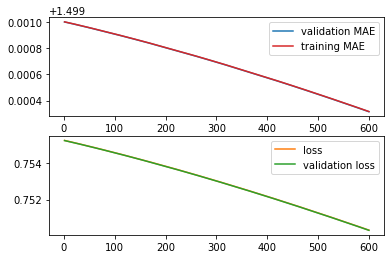

Done.


In [27]:
epochs=600
print("Plotting...")
f, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(range(1, epochs+1), history.history['val_mae'], 'tab:blue', label="validation MAE")
ax1.plot(range(1, epochs+1), history.history['mae'], 'tab:red', label="training MAE")

ax2.plot(range(1, epochs+1), history.history['loss'], 'tab:orange', label="loss")
ax2.plot(range(1, epochs+1), history.history['val_loss'], 'tab:green', label="validation loss")

ax1.legend()
ax2.legend()

f.savefig('training-softmax.png', dpi=300)
plt.show()
print("Done.")

In [28]:
model.save('Model-Softmax-cnn.h5')